# Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/Churn_Modelling.csv')

In [3]:
# Manually Making Values Null / NaN
df.loc[0:50, 'Gender'] = np.nan
df['Age'] = df['Age'].where(df['Age'] < 70, np.nan)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9949 non-null   object 
 6   Age              9849 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [65]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,9849.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.380242,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,9.591467,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,43.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,69.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [66]:
df.head(100)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,NaN,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,NaN,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,NaN,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,NaN,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,NaN,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,15699461,Fiorentini,515,Spain,Male,35.0,10,176273.95,1,0,1,121277.78,0
96,97,15738721,Graham,773,Spain,Male,41.0,9,102827.44,1,0,1,64595.25,0
97,98,15693683,Yuille,814,Germany,Male,29.0,8,97086.40,2,1,1,197276.13,0
98,99,15604348,Allard,710,Spain,Male,22.0,8,0.00,2,0,0,99645.04,0


In [67]:
df.drop(columns=['RowNumber'], inplace=True)

In [68]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,NaN,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,NaN,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,NaN,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,NaN,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,NaN,43.0,2,125510.82,1,1,1,79084.10,0


## Handling Missing Values

In [69]:
# df.isna().sum()
df.isnull().sum()

CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender              51
Age                151
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

### 1) Droping Columns with missing data

In [71]:
updated_df = df.dropna(axis=1)

In this case, 151 out of 10,000 values for Age and 51 out of 10,000 values for Gender are null.

Dropping the entire column may not be wise, as it could result in losing valuable information.

This approach should only be used when the number of nulls is excessively high.

In [76]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [75]:
updated_df.describe()

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [74]:
updated_df.head()

,CustomerId,Surname,CreditScore,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,2,125510.82,1,1,1,79084.10,0


### 2) Droping Rows with missing data

In [89]:
updated_df = df.dropna(axis=0).reset_index(drop=True)

In this case, dropping the rows with missing data seems wise decision, as it could not result in losing valuable information.

And there are possibilities of getting better accuracy than before

In [90]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9798 non-null   int64  
 1   Surname          9798 non-null   object 
 2   CreditScore      9798 non-null   int64  
 3   Geography        9798 non-null   object 
 4   Gender           9798 non-null   object 
 5   Age              9798 non-null   float64
 6   Tenure           9798 non-null   int64  
 7   Balance          9798 non-null   float64
 8   NumOfProducts    9798 non-null   int64  
 9   HasCrCard        9798 non-null   int64  
 10  IsActiveMember   9798 non-null   int64  
 11  EstimatedSalary  9798 non-null   float64
 12  Exited           9798 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 995.2+ KB


In [91]:
updated_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.798000e+03,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000
mean,1.569090e+07,650.412839,38.378955,5.012758,76667.398677,1.529598,0.705450,0.508981,100117.117179,0.205144
std,7.187383e+04,96.482054,9.595067,2.891869,62413.840736,0.581863,0.455863,0.499945,57508.828783,0.403827
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51036.905000,0.000000
50%,1.569073e+07,652.000000,37.000000,5.000000,97387.355000,1.000000,1.000000,1.000000,100238.110000,0.000000
75%,1.575311e+07,717.000000,43.000000,7.000000,127736.122500,2.000000,1.000000,1.000000,149400.922500,0.000000
max,1.581569e+07,850.000000,69.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [92]:
updated_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15768193,Trevisani,585,Germany,Male,36.0,5,146050.97,2,0,0,86424.57,0
1,15683553,O'Brien,788,France,Female,33.0,5,0.00,2,0,0,116978.19,0
2,15702298,Parkhill,655,Germany,Male,41.0,8,125561.97,1,0,0,164040.94,1
3,15569590,Yoo,601,Germany,Male,42.0,1,98495.72,1,1,0,40014.76,1
4,15760861,Phillipps,619,France,Male,43.0,1,125211.92,1,1,1,113410.49,0


### 3) Filling the missing values - Imputation

**In this case, we will be filling the missing values with a certain number.**

**The possible ways to do this are:**

    Filling the missing data with the mean or median value if it's a numerical variable.

    Filling the missing data with mode if it's a categorical value.

    Filling the numerical value with 0 or -999, or some other number that will not occur in the data. This can be done so that the machine can recognize that the data is not real or is different.

    Filling the categorical value with a new type for the missing values.

    If dataset has too many outliers, it is better to use median and vise versa for mean

In [93]:
df['Age'].mean()

np.float64(38.38024164889836)

In [94]:
df['Age'].median()

np.float64(37.0)

In [95]:
df['Age'].mode()

0    37.0
Name: Age, dtype: float64

In [120]:
# fillna fills the null records
updated_df = df
updated_df['Age'] = updated_df['Age'].fillna(df['Age'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           9950 non-null   object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


In [125]:
updated_df1 = df
updated_df1['Age'] = updated_df1['Age'].fillna(df['Age'].median())
updated_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           9950 non-null   object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


In [115]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [111]:
# fillna fills the null records
updated_df['Gender'] = updated_df['Gender'].fillna(df['Gender'].mode())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           9950 non-null   object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


### 4) Forward and Backward filling - Imputation

In [127]:
df = pd.read_csv('../Data/Churn_Modelling.csv')
# Manually Making Values Null / NaN
df.loc[0:50, 'Gender'] = np.nan
df['Age'] = df['Age'].where(df['Age'] < 70, np.nan)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9949 non-null   object 
 6   Age              9849 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [140]:
df1 = df
# Backward filling
df1['Age'] = df1['Age'].bfill()

In [135]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9949 non-null   object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [139]:
df2 = df
# Forward filling
df2['Age'] = df2['Age'].ffill()

In [138]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9949 non-null   object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## Feature Scaling

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv('../Data/Churn_Modelling.csv')
# Manually Making Values Null / NaN
df.loc[0:50, 'Gender'] = np.nan
df['Age'] = df['Age'].where(df['Age'] < 70, np.nan)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9949 non-null   object 
 6   Age              9849 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [145]:
# uses z-score normalization
from sklearn.preprocessing import StandardScaler
# uses min-max normalization
from sklearn.preprocessing import MinMaxScaler

### 1) Normalization

In [170]:
new_df = pd.DataFrame(df, columns=['Age','Tenure'])
new_df.head()

,Age,Tenure
0,42.0,2
1,41.0,1
2,42.0,8
3,39.0,1
4,43.0,2


In [171]:
new_df['Age'] = new_df['Age'].fillna(new_df['Age'].mean())

In [195]:
min_max_scaler = MinMaxScaler()
normalized_df = min_max_scaler.fit_transform(new_df)
normalized_df

array([[0.47058824, 0.2       ],
       [0.45098039, 0.1       ],
       [0.47058824, 0.8       ],
       ...,
       [0.35294118, 0.7       ],
       [0.47058824, 0.3       ],
       [0.19607843, 0.4       ]])

In [196]:
# another example
x_arr = np.array([[3],[5],[6],[6],[2],[4],[4]])
normalized_arr = min_max_scaler.fit_transform(x_arr)
normalized_arr

array([[0.25],
       [0.75],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.5 ],
       [0.5 ]])

### 2) Standardization

In [200]:
std_scaler = StandardScaler()
normalized_df = std_scaler.fit_transform(new_df)
normalized_df

array([[ 0.38029491, -1.04175968],
       [ 0.27523406, -1.38753759],
       [ 0.38029491,  1.03290776],
       ...,
       [-0.25007023,  0.68712986],
       [ 0.38029491, -0.69598177],
       [-1.09055707, -0.35020386]])

In [201]:
# another example
x_arr = np.array([[3],[5],[6],[6],[2],[4],[4]])
normalized_arr = std_scaler.fit_transform(x_arr)
normalized_arr

array([[-0.92827912],
       [ 0.51571062],
       [ 1.2377055 ],
       [ 1.2377055 ],
       [-1.65027399],
       [-0.20628425],
       [-0.20628425]])

## Outlier Treatment

### 1) 3-Sigma Technique (Standard Deviation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
df = pd.read_csv('../Data/raw_sales.csv', parse_dates=True)

In [3]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [4]:
def find_anomalies(data):
    # List to accumulate anomalies
    anomalies = []

    # Calculate the mean and standard deviation of the data
    data_mean = statistics.mean(data)
    data_std = statistics.stdev(data)

    # Define the cutoff for anomalies (3 standard deviations)
    anomaly_cutoff = data_std * 3
    lower_limit = data_mean - anomaly_cutoff
    upper_limit = data_mean + anomaly_cutoff

    # Identify outliers
    for value in data:
        if value < lower_limit or value > upper_limit:
            anomalies.append(value)

    return anomalies

In [5]:
anomalies = find_anomalies(df.price)

In [6]:
len(anomalies)

461

In [7]:
len(df)

29580

In [8]:
# check if data is normaly distributed
# percentage should be closer to 0.3%
percentage = (len(anomalies) / len(df)) * 100
percentage

1.5584854631507776

In [9]:
print(df.price.skew())

4.312009366902366


<Axes: xlabel='price', ylabel='Density'>

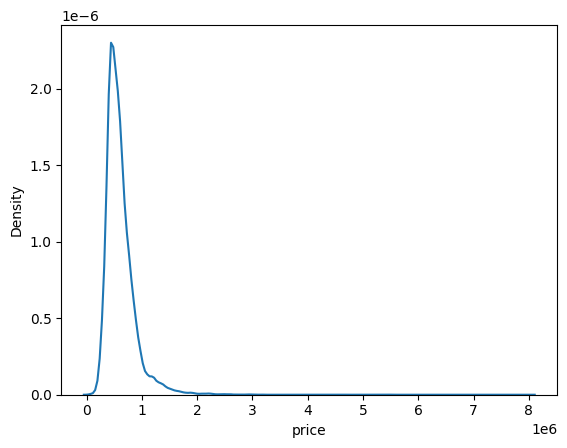

In [10]:
sns.kdeplot(df.price)

In [11]:
df['transformed_price'] = np.log(df.price)

In [12]:
print(df.transformed_price.skew())

0.4731646269984763


In [13]:
anomalies2 = find_anomalies(df.transformed_price)

In [14]:
len(anomalies2)

266

In [15]:
# check if data is normaly distributed
# percentage should be closer to 0.3%
percentage = (len(anomalies2) / len(df)) * 100
percentage

0.8992562542258282

<Axes: xlabel='transformed_price', ylabel='Density'>

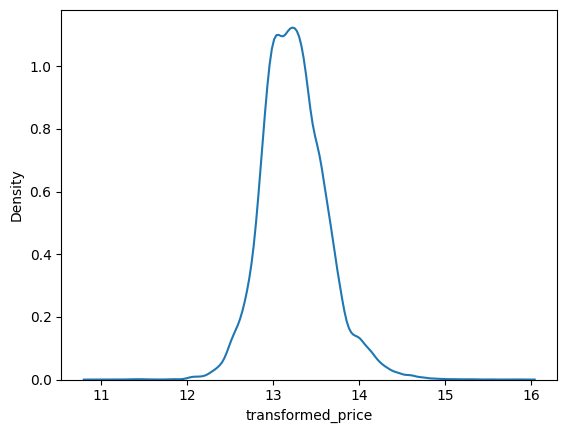

In [16]:
sns.kdeplot(df.transformed_price)

In [17]:
df['double_transformed_price'] = np.log(df.transformed_price)

In [18]:
print(df.double_transformed_price.skew())

0.33092530655758573


In [19]:
anomalies3 = find_anomalies(df.double_transformed_price)

In [20]:
# check if data is normaly distributed
# percentage should be closer to 0.3%
percentage = (len(anomalies3) / len(df)) * 100
percentage

0.8485463150777552

<Axes: xlabel='double_transformed_price', ylabel='Density'>

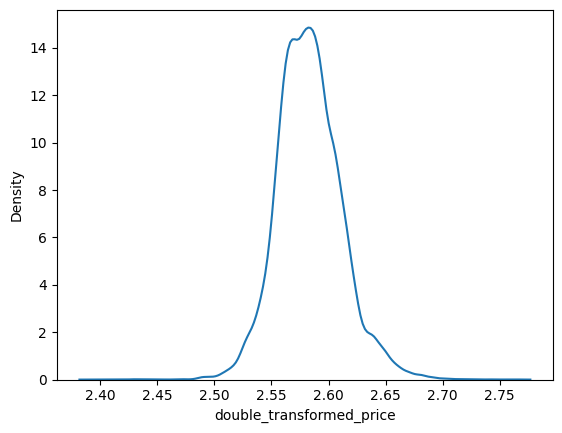

In [22]:
sns.kdeplot(df.double_transformed_price)

### 2) Boxplots

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

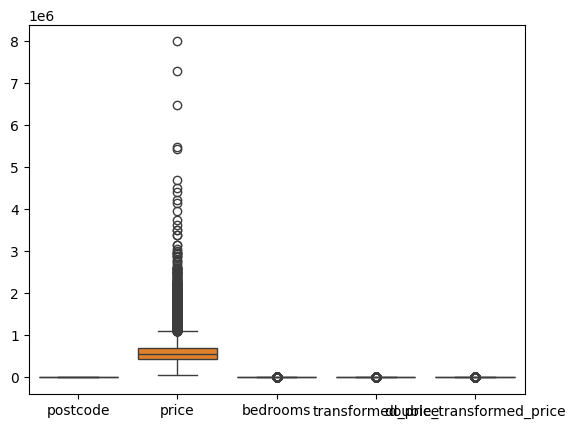

In [35]:
sns.boxplot(data=df)

## Different Types of Analysis

### 1) Univariate analysis

In [39]:
import numpy as np
import pandas as od 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('../Data/Churn_Modelling.csv')

In [43]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
new_data = data[['Geography', 'Gender', 'Exited']]

In [46]:
new_data.head()

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


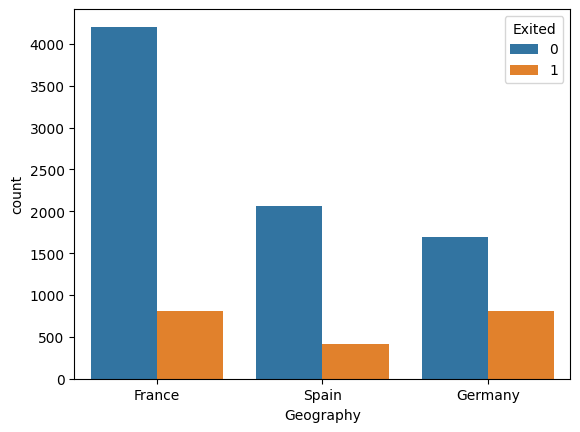

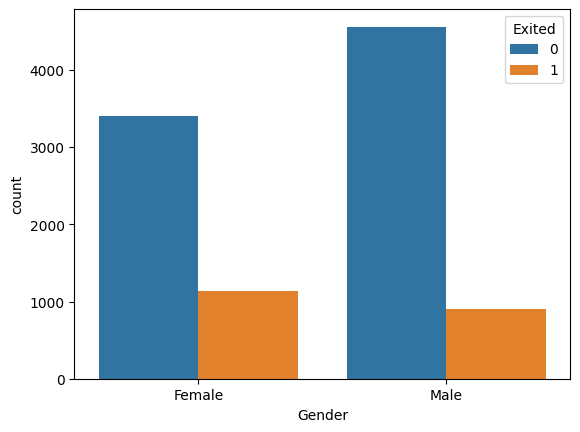

In [59]:
for i, x in enumerate(new_data.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(new_data, x=x, hue='Exited')

### 2) Bivariate analysis

<Axes: xlabel='Gender', ylabel='Count'>

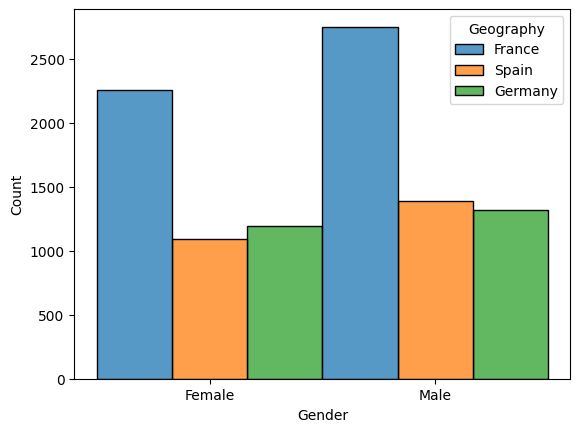

In [73]:
sns.histplot(x='Gender', hue='Geography', data=new_data, stat='count', multiple='dodge')

<Axes: xlabel='Gender', ylabel='Count'>

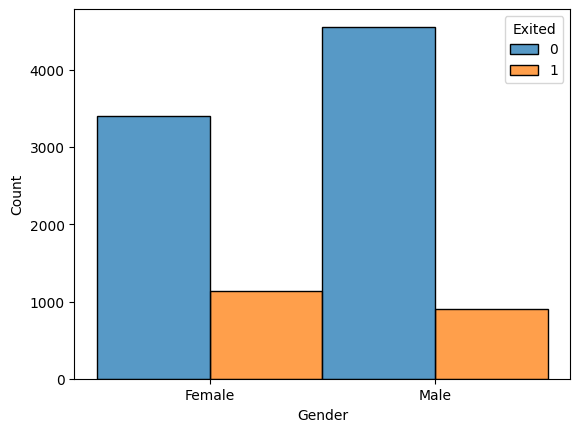

In [67]:
sns.histplot(x='Gender', hue='Exited', data=new_data, stat='count', multiple='dodge')

<Axes: xlabel='Gender', ylabel='Count'>

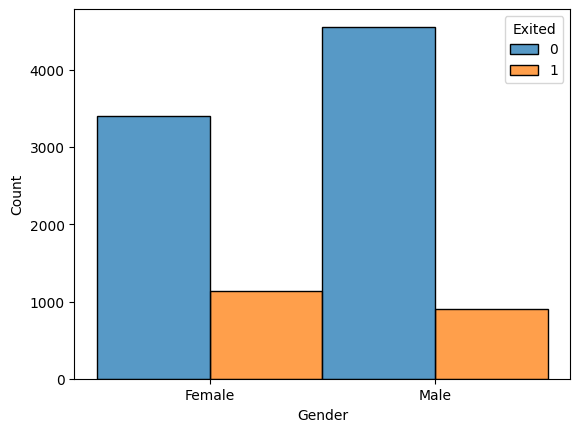

In [69]:
sns.histplot(x='Gender', hue='Exited', data=new_data, stat='count', multiple='dodge')

<Axes: xlabel='Geography', ylabel='Count'>

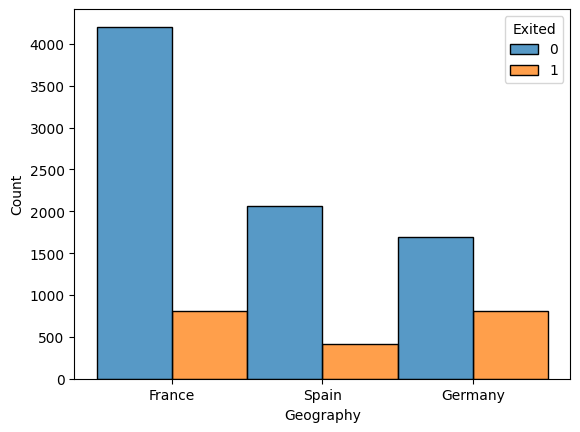

In [70]:
sns.histplot(x='Geography', hue='Exited', data=new_data, stat='count', multiple='dodge')

In [75]:
exited_data = new_data.loc[new_data['Exited'] == 1]

<Axes: xlabel='Gender', ylabel='Count'>

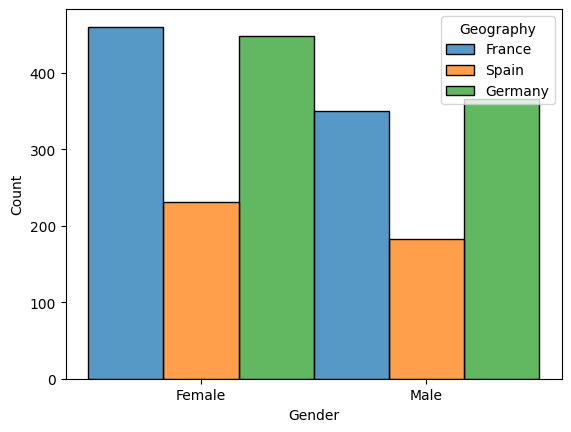

In [76]:
sns.histplot(x='Gender', hue='Geography', data=exited_data, stat='count', multiple='dodge')

### 3) Numerical analysis

#### Correlation
Ranges between -1 and +1
- -1 --> Negative Correlated
- +1 --> Positive Correlated
- ~0 --> No Correlated

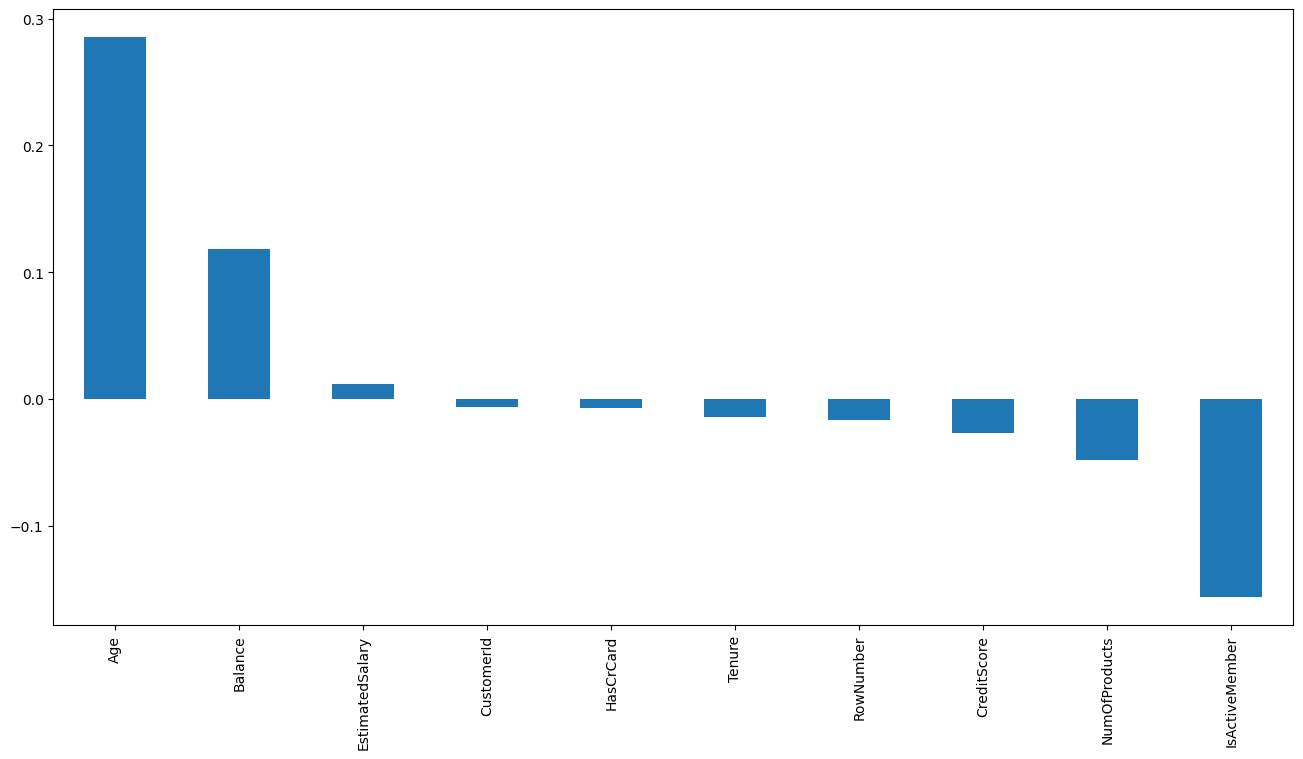

In [111]:
corr = data.select_dtypes(include=['int', 'float']).corr()
corr_exited = corr['Exited'].drop('Exited').sort_values(ascending=False)

plt.figure(figsize=(16, 8))
corr_exited.plot(kind='bar')
plt.show()

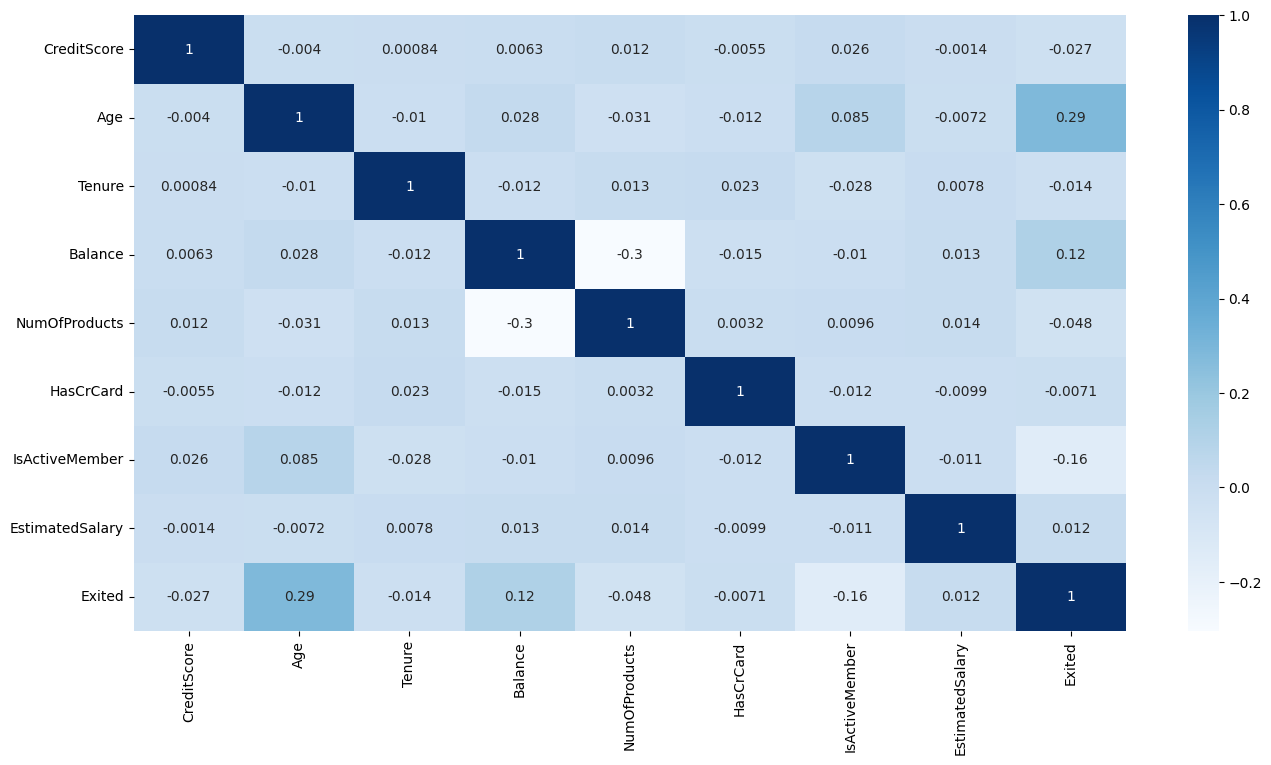

In [124]:
data_filtered = data.drop(['RowNumber', 'CustomerId'], axis=1)

corr = data_filtered.select_dtypes(include=['int', 'float']).corr()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr, cmap='Blues', annot=True)
plt.show()

<Axes: xlabel='Age'>

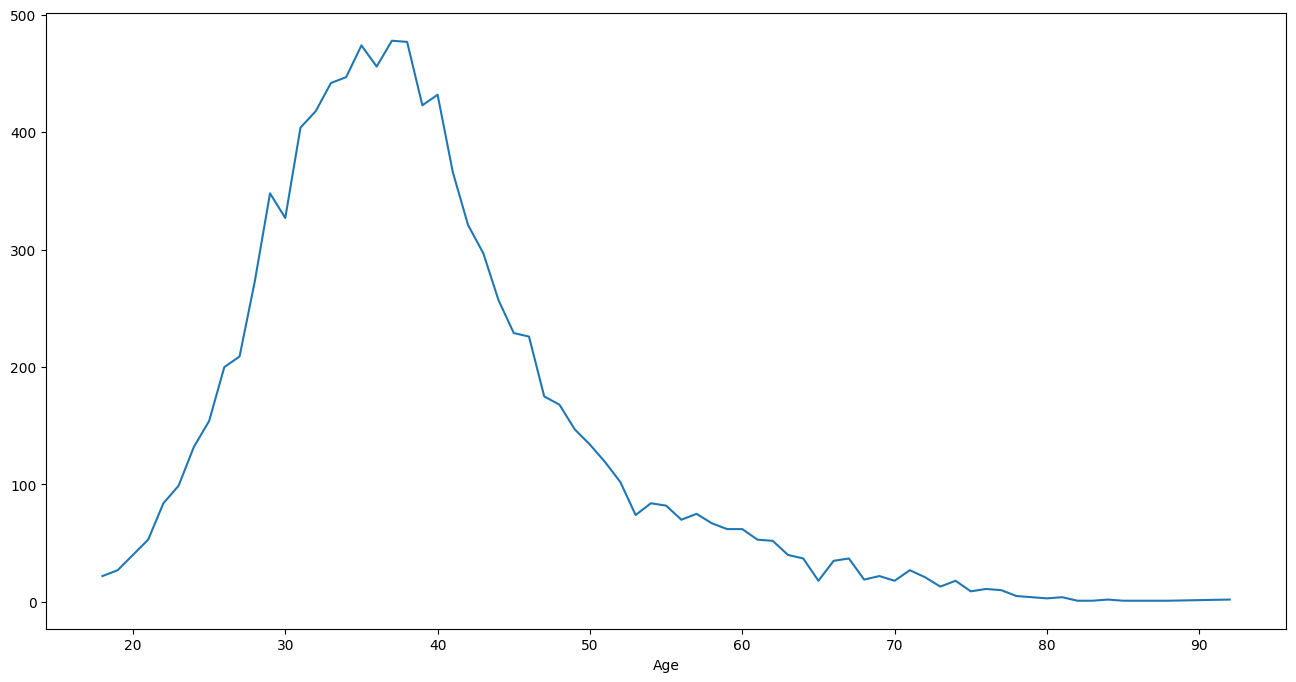

In [129]:
plt.figure(figsize=(16, 8))
data['Age'].value_counts().sort_index(ascending=True).plot()

<Axes: xlabel='Age'>

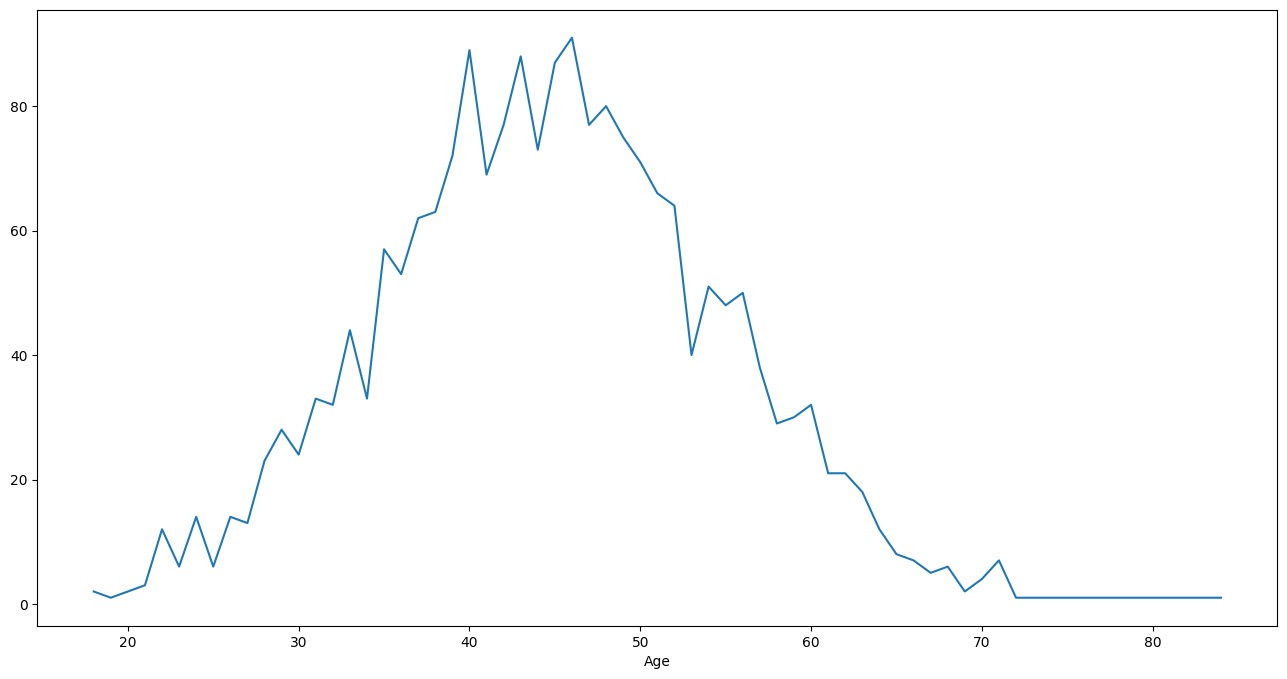

In [134]:
exited_data_1 = data.loc[data['Exited'] == 1]
plt.figure(figsize=(16, 8))
exited_data_1['Age'].value_counts().sort_index(ascending=True).plot()

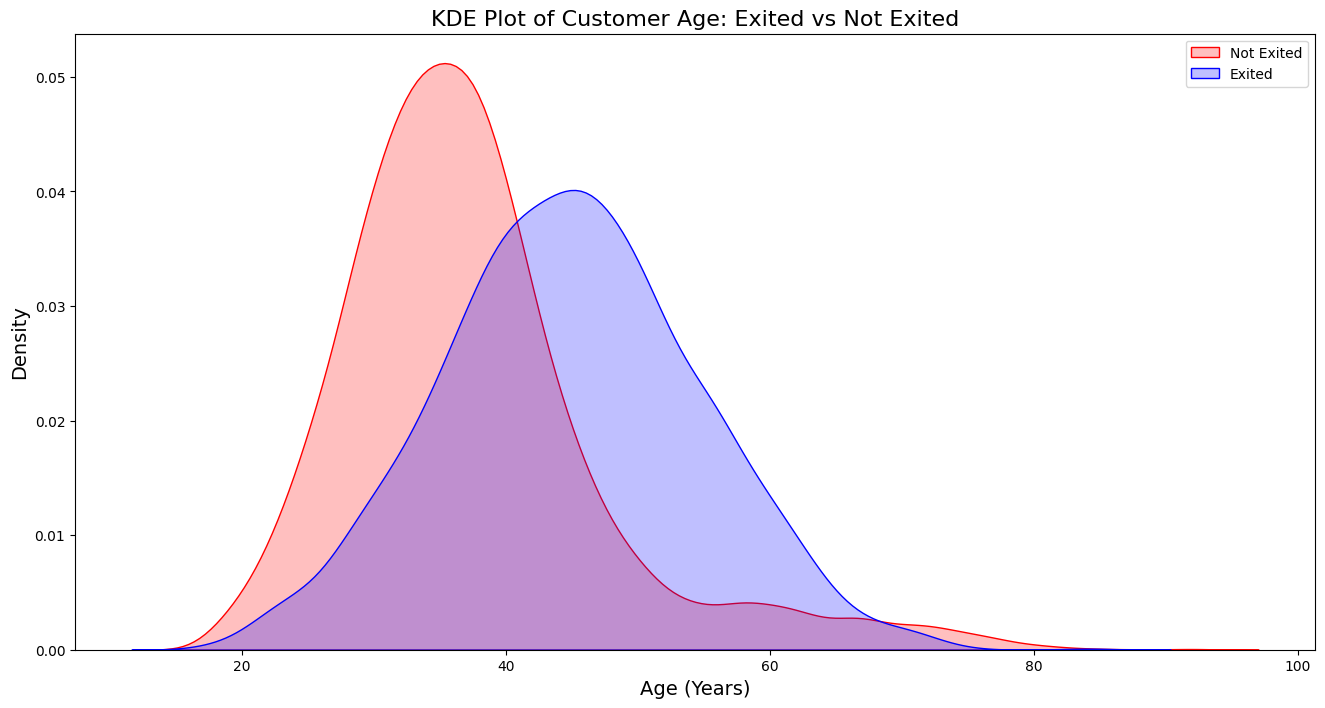

In [155]:
plt.figure(figsize=(16, 8))

sns.kdeplot(data.Age[data['Exited'] == 0], color='red', fill=True, label='Not Exited')
sns.kdeplot(data.Age[data['Exited'] == 1], color='blue', fill=True, label='Exited')

plt.legend(loc='upper right')
plt.title('KDE Plot of Customer Age: Exited vs Not Exited', fontsize=16)
plt.xlabel('Age (Years)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

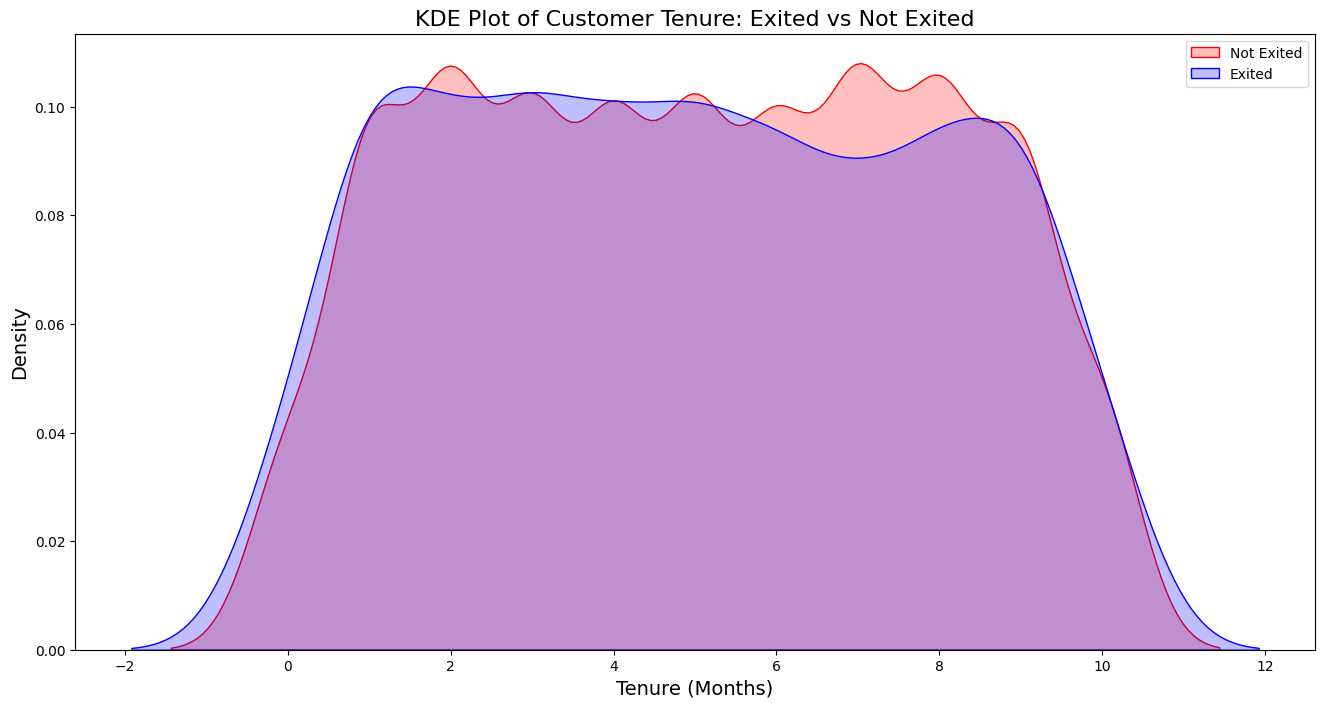

In [159]:
plt.figure(figsize=(16, 8))

sns.kdeplot(data.Tenure[data['Exited'] == 0], color='red', fill=True, label='Not Exited')
sns.kdeplot(data.Tenure[data['Exited'] == 1], color='blue', fill=True, label='Exited')

plt.legend(loc='upper right')
plt.title('KDE Plot of Customer Tenure: Exited vs Not Exited', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

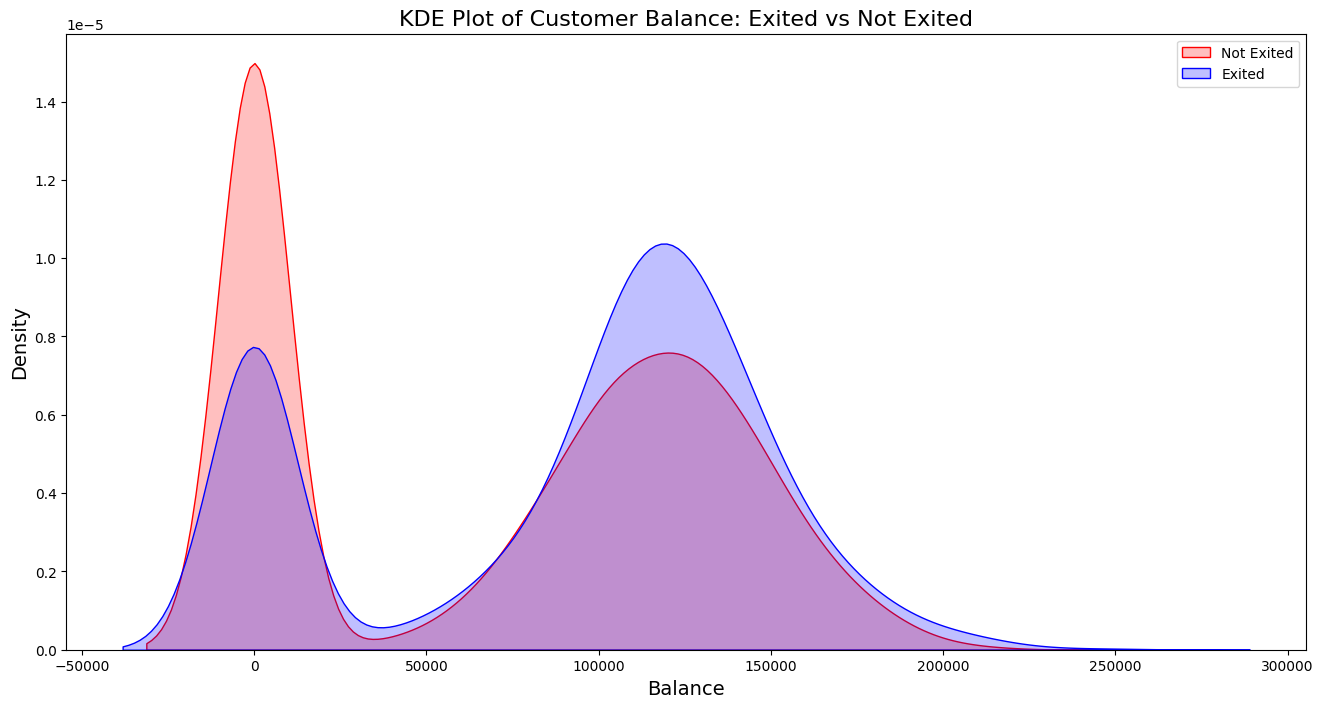

In [158]:
plt.figure(figsize=(16, 8))

sns.kdeplot(data.Balance[data['Exited'] == 0], color='red', fill=True, label='Not Exited')
sns.kdeplot(data.Balance[data['Exited'] == 1], color='blue', fill=True, label='Exited')

plt.legend(loc='upper right')
plt.title('KDE Plot of Customer Balance: Exited vs Not Exited', fontsize=16)
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

## Feature Binning

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [18]:
df = pd.read_csv('../Data/Churn_Modelling.csv')

In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.drop(columns=['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.Age.min()

18

In [13]:
df.Age.max()

92

In [5]:
labels = ['0-20', '21-40', '41-60', 'Above 60']
bins = [0, 20, 40, 60, 100]

df['Age_Bins'] = pd.cut(df.Age, bins, labels=labels, include_lowest=True)

In [8]:
df[['Age','Age_Bins']]

,Age,Age_Bins
0,42.0,41-60
1,41.0,41-60
2,42.0,41-60
3,39.0,21-40
4,43.0,41-60
...,...,...
9995,39.0,21-40
9996,35.0,21-40
9997,36.0,21-40
9998,42.0,41-60


In [ ]:
df[['Age','Age_Bins']].to_csv('test.csv', index=False)

In [17]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y.iloc[i], y.iloc[i])

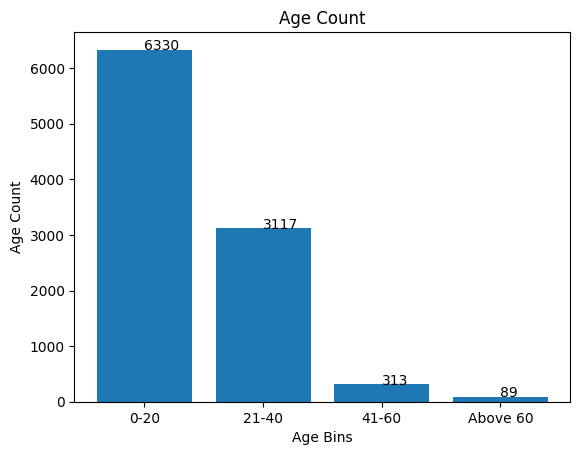

In [18]:
plt.bar(labels, df.Age_Bins.value_counts())

add_labels(labels, df.Age_Bins.value_counts())

plt.title('Age Count')
plt.xlabel('Age Bins')
plt.ylabel ('Age Count')
plt.show()

## Feature Encoding